![Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMuzewPROs_ZP6TcwHgiwqHgHnuwrMkwVItA&usqp=CAU)
# Finding Heavy Traffic Indicators on I-94
Analysis of a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). Record of the traffic data conducted by station located between Minneapolis and Saint Paul (only westbound traffic - cars moving from east to west).

The main goal of the project is to determine indicators of heavy traffic such as:
***
- weather type;
- time of the day/week;
- etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('C:/Users/fsi/Desktop/DATAQUEST/2. Intermediate Python and Pandas/2. Data Visualization Fundamentals/6. Guided Project Finding Heavy Traffic Indicators on I-94/Metro_Interstate_Traffic_Volume.csv')
traffic.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


The dataset has 48,204 rows and 9 columns. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

## Analyzing Traffic Volume

<AxesSubplot:ylabel='Frequency'>

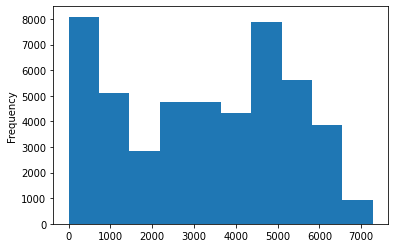

In [3]:
traffic['traffic_volume'].plot.hist()

In [4]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on observation of the histogram and the result of `.describe()` method we can conclude that 25% account for the night traffic (1193), rest & much bussiest volume occure during daytime. Further analysis of day/night relationship would shed light on the nuances of the traffic situation.

### Comparing daytime and nighttime data by dividing dataset into two parts using `datetime` library:
***
- *Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)*
- *Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)*

In [5]:
import datetime as dt
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].tail()

48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, dtype: datetime64[ns]

### Isolation of day and night datasets

In [6]:
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19)] #boolean indexing!
nighttime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour <= 7)] #boolean indexing!
nighttime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


### Placing two histograms on the gird chart

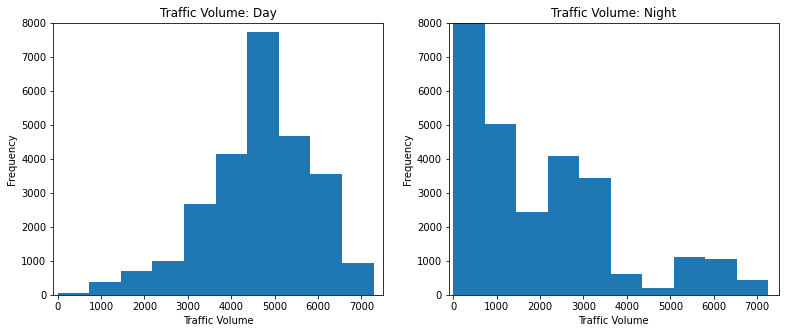

In [7]:
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
daytime['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
nighttime['traffic_volume'].describe()

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

***Comparison results:***

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are `4021` or more cars passing the station each hour 75% of the time (because 25% of values are less than `4021`).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than `2934`.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data.

### Getting the average traffic volume for each `month`

In [10]:
# to crate a new column where each value describes the month when the traffic volume measurment was taken
daytime['month'] = daytime['date_time'].dt.month

# to group the dataset by the month column with the mean as an aggregate function
by_month = daytime.groupby('month').mean()

by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

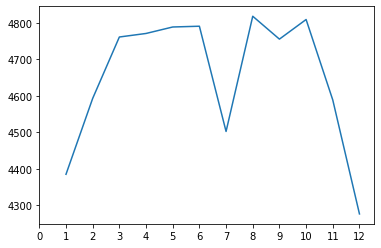

In [11]:
plt.plot(by_month['traffic_volume'])
plt.xticks(np.arange(0, 13, 1))
plt.show()

The traffic looks less heavy during November – February period and more intense during March – October period, with the exception of July due to road construction in 2016, what was reflected in the dataset.

### Getting the average traffic volume for each `day of the week`

In [12]:
# to crate a new column where each value describes the day of the week when the traffic volume measurment was taken
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek

# to group the dataset by the day of the week column with the mean as an aggregate function
by_dayofweek = daytime.groupby('dayofweek').mean()

by_dayofweek['traffic_volume']

dayofweek
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

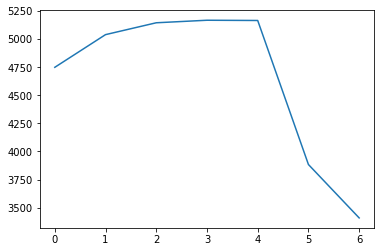

In [13]:
plt.plot(by_dayofweek['traffic_volume'])
plt.xticks(np.arange(0, 7, 1))
plt.show()

Traffic volume is significantly heavier on business days with values over 5,000 during business days (exception: Monday). Traffic is lighter on weekends, with values below 4,000 cars.

### Getting the average traffic volume for each `hour` with separation of business days & weekends

In [14]:
daytime['hour'] = daytime['date_time'].dt.hour
business_day = daytime.copy()[daytime['dayofweek'] <= 4] # boolean indexing till Friday (4==Friday)
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # boolean indexing from Saturday till Monday (5==Saturday)
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


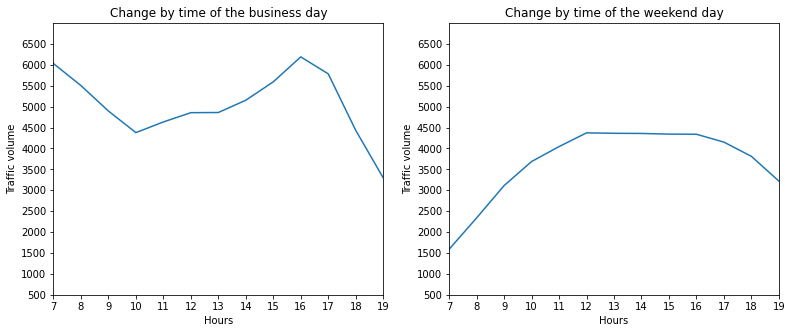

In [15]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Change by time of the business day')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xticks(np.arange(6, 20, 1))
plt.yticks(np.arange(500, 7000, 500))
plt.xlim(7, 19)
plt.ylim(500, 7000)


plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Change by time of the weekend day')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xticks(np.arange(6, 20, 1))
plt.yticks(np.arange(500, 7000, 500))
plt.xlim(7, 19)
plt.ylim(500, 7000)

plt.show()


At each hour of the day, the traffic volume is generally higher during business days compared to the weekends.

On the bussiness day the worst traffic situation is during the time people going to/from work: around 7:00 & 16:00.

On the weekends the worst traffic situation is during the period: 12:00 till 16:00.

### Finding the correlation values between `traffic_volume` and the numerical weather columns

In [16]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25838 entries, 0 to 48199
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              25838 non-null  object        
 1   temp                 25838 non-null  float64       
 2   rain_1h              25838 non-null  float64       
 3   snow_1h              25838 non-null  float64       
 4   clouds_all           25838 non-null  int64         
 5   weather_main         25838 non-null  object        
 6   weather_description  25838 non-null  object        
 7   date_time            25838 non-null  datetime64[ns]
 8   traffic_volume       25838 non-null  int64         
 9   month                25838 non-null  int64         
 10  dayofweek            25838 non-null  int64         
 11  hour                 25838 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.3+ MB


In [17]:
print(daytime['traffic_volume'].corr(daytime['temp']))
print(daytime['traffic_volume'].corr(daytime['rain_1h']))
print(daytime['traffic_volume'].corr(daytime['snow_1h']))
print(daytime['traffic_volume'].corr(daytime['clouds_all']))

0.11808381454022035
0.0040203285532569135
0.0037684656522925263
-0.03340950373199396


In [18]:
daytime.corr()['traffic_volume'] #all correlations of dataframe

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.12.

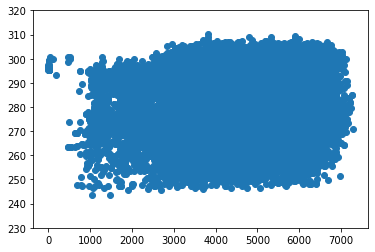

In [19]:
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

### Analysis of weather types

*Calculation of the average traffic volume associated with each unique value in columns `weather_main `&` weather_description` by grouping the data in the columns by usimg the `mean()` as an aggregate function.*

In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

#print(by_weather_main['traffic_volume'].round(2))
print('\n')
#print(by_weather_description['traffic_volume'].round(2))

In [24]:
by_weather_main['traffic_volume']

weather_main
Clear           4661.666879
Clouds          4746.375927
Drizzle         4712.699060
Fog             4298.933511
Haze            4545.434932
Mist            4530.901782
Rain            4686.953503
Smoke           4447.307692
Snow            4295.594612
Squall          4211.000000
Thunderstorm    4512.479042
Name: traffic_volume, dtype: float64

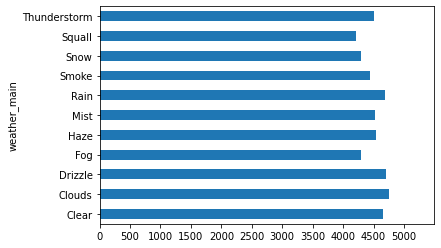

In [22]:
by_weather_main['traffic_volume'].plot.barh()
plt.xticks(np.arange(0, 5500, 500))
plt.xlim(0, 5500)
plt.show()

At this ponit there is no traffic volume exceeding 5000 cars. Considering this classification of weather types is inconclusive. Next, we will try to consider `weather_description`.

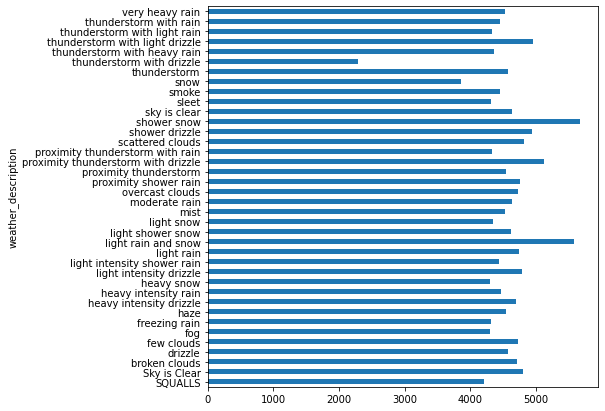

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(7, 7))
plt.show()

There are several heavy traffic indicators with traffic volume exceeding 5000 cars: light rain & snow, etc.

### Conclusion
***Time indicators:***
***
>* The traffic is usually heavier during March–October period compared to cold months.
>* The traffic is usually heavier on business days compared to the weekends.
>* On business days, the rush hours are around 7 & 16.

***Weather indicators:***
***
>* Shower snow
>* Light rain and snow
>* Proximity thunderstorm with drizzle